In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [30]:
submit_X = pd.read_csv('Source_data/testset_values.csv')

In [31]:
data_test = test_transformer(submit_X)

In [35]:
data_test.columns == data.drop(columns=['label']).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
num_cols = ['gps_height', 'population']
cat_cols = ['basin', 'region_code', 'district_code', 'extraction_type', 'payment_type', 'water_quality', 'quantity', 
            'source', 'management', 'management_group', 'waterpoint_type',  'funder', 'installer', 'subvillage', 
            'ward', 'scheme_management', 'scheme_name', 'amount_tsh']

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [7]:
data2.columns

Index(['id', 'label', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'subvillage',
       'region_code', 'district_code', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source', 'waterpoint_type', 'lga_Njombe',
       'year', 'month', 'tsh_bin', 'years_old', 'popbins'],
      dtype='object')

In [8]:
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')

In [67]:
train_num = data2.loc[:,]

In [68]:
for c in train_num.columns:
    train_num[c] = scaler.fit_transform(train_num.loc[:,c].to_numpy().reshape(-1,1))#

In [69]:
train_num

,amount_tsh,gps_height,population
0,1.895665,1.041252,-0.150399
1,-0.105970,1.054237,0.212290
2,-0.097630,0.025541,0.148660
3,-0.105970,-0.584751,-0.258570
4,-0.105970,-0.964200,-0.381587
...,...,...,...
59395,-0.102634,0.781553,-0.116463
59396,1.461977,0.784439,-0.262812
59397,-0.105970,-0.964200,-0.381587
59398,-0.105970,-0.964200,-0.381587


In [70]:
colt = ColumnTransformer([('basin', ohe, ['basin']), 
                          ('r_code', ohe, ['region_code']), 
                          ('d_code', ohe, ['district_code']), 
                          ('ex', ohe, ['extraction_type']), 
                          ('pay', ohe, ['payment_type']), 
                          ('qual', ohe, ['water_quality']),
                          ('quant', ohe, ['quantity']), 
                          ('s_type', ohe, ['source']),
                          ('mang', ohe, ['management']),
                          ('mang_g', ohe, ['management_group']),
                          ('wp_type', ohe, ['waterpoint_type']),
                         ('fund', ohe, ['funder']),
                         ('inst', ohe, ['installer']),
                         ('subv', ohe, ['subvillage']),
                         ('ward', ohe, ['ward']),
                         ('sch_man', ohe, ['scheme_management']),
                         ('sch', ohe, ['scheme_name'])])

In [71]:
train_cat = data2.loc[:,]
train_df = colt.fit_transform(train_cat).toarray()

In [72]:
train_cat = pd.DataFrame(train_df, columns=colt.get_feature_names())

In [73]:
train = train_num.merge(train_cat, left_index=True, right_index=True)

In [74]:
train

,amount_tsh,gps_height,population,basin__x0_Lake Nyasa,basin__x0_Lake Rukwa,basin__x0_Lake Tanganyika,basin__x0_Lake Victoria,basin__x0_Pangani,basin__x0_Rufiji,basin__x0_Ruvuma-Southern_Coast,...,sch__x0_K,sch__x0_M,sch__x0_N,sch__x0_Ngana water supplied scheme,sch__x0_None,sch__x0_Uroki-Bomang'ombe water sup,sch__x0_other,sch__x0_unknown,sch__x0_wanging'ombe supply scheme,sch__x0_wanging'ombe water supply s
0,1.895665,1.041252,-0.150399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.105970,1.054237,0.212290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.097630,0.025541,0.148660,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.105970,-0.584751,-0.258570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.105970,-0.964200,-0.381587,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-0.102634,0.781553,-0.116463,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59396,1.461977,0.784439,-0.262812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59397,-0.105970,-0.964200,-0.381587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59398,-0.105970,-0.964200,-0.381587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
train.shape

(59400, 190)

In [76]:
train = train.merge(data2[['lga_Njombe', 'year', 'month', 'tsh_bin', 'years_old', 'popbins', 'longitude', 'latitude', 
                          'public_meeting', 'permit']], left_index=True, right_index=True)

In [26]:
train_X, test_X, train_y, test_y = train_test_split(train, data2['label'], test_size=0.25, random_state=42)

In [27]:
rf = RandomForestClassifier()
params = {'n_estimators':[10, 100, 200, 500], 'criterion':['gini', 'entropy']}
rs = RandomizedSearchCV(rf, params, n_iter=5)

In [28]:
rf.fit(train_X, train_y)
rf.score(test_X, test_y)

0.7979124579124579

In [29]:
rs.fit(train_X, train_y)
rs.best_estimator_
rs.cv_results_

{'mean_fit_time': array([16.49142489, 74.91134934, 29.68260112, 32.43178997, 15.27018642]),
 'std_fit_time': array([0.4725192 , 1.32355375, 0.16702165, 0.28525934, 0.17173629]),
 'mean_score_time': array([0.60192151, 2.54108801, 1.09002266, 1.07260098, 0.62121105]),
 'std_score_time': array([0.02251904, 0.11049872, 0.01190311, 0.01315262, 0.01541706]),
 'param_n_estimators': masked_array(data=[100, 500, 200, 200, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['entropy', 'gini', 'gini', 'entropy', 'gini'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100, 'criterion': 'entropy'},
  {'n_estimators': 500, 'criterion': 'gini'},
  {'n_estimators': 200, 'criterion': 'gini'},
  {'n_estimators': 200, 'criterion': 'entropy'},
  {'n_estimators': 100, 'criterion': 'gini'}],
 'split0_test_score': array(

In [19]:
rf.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [83]:
features = pd.Series(rf.feature_importances_, index=train.columns)

In [84]:
features.sort_values(ascending=False).head(20)

latitude                          0.118386
longitude                         0.117219
gps_height                        0.058571
years_old                         0.047030
quant__x0_enough                  0.038732
population                        0.037807
wp_type__x0_other                 0.028350
ex__x0_other                      0.024466
month                             0.021519
quant__x0_insufficient            0.020961
amount_tsh                        0.019035
tsh_bin                           0.018258
popbins                           0.016125
pay__x0_never pay                 0.011492
ward__x0_small                    0.010792
wp_type__x0_communal standpipe    0.010536
fund__x0_other                    0.009737
ward__x0_medium                   0.009619
ward__x0_verysmall                0.009220
wp_type__x0_hand pump             0.008867
dtype: float64

In [30]:
data2['label2'] = data2['label'].replace({'functional needs repair':'functional'})

In [32]:
train_X, test_X, train_y, test_y = train_test_split(train, data2['label'], test_size=0.25, random_state=42)

In [33]:
rf.fit(train_X, train_y)
rf.score(test_X, test_y)

0.7985185185185185

In [31]:
rs.score(test_X, test_y)

0.7999326599326599

In [34]:
y_pred = rs.predict(test_X)

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 2880x576 with 0 Axes>

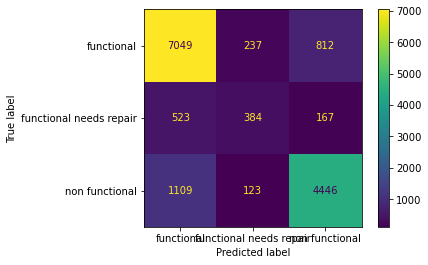

In [41]:
cm=confusion_matrix(test_y, y_pred, labels=rs.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rs.classes_)
plt.figure(figsize=(40,8))
disp.plot()

In [47]:
test_X.insert(2,value=y_pred, column='prediction')

ValueError: cannot insert prediction, already exists

In [48]:
test_X

,amount_tsh,gps_height,prediction,population,basin__x0_Lake Nyasa,basin__x0_Lake Rukwa,basin__x0_Lake Tanganyika,basin__x0_Lake Victoria,basin__x0_Pangani,basin__x0_Rufiji,...,lga_Njombe,year,month,tsh_bin,years_old,popbins,longitude,latitude,public_meeting,permit
2980,-0.105970,-0.964200,non functional,-0.381587,0.0,0.0,1.0,0.0,0.0,0.0,...,0,2012,10,1,13,1,31.985658,-3.596360,1,1
5246,-0.105970,-0.964200,non functional,-0.381587,0.0,0.0,1.0,0.0,0.0,0.0,...,0,2012,11,1,13,1,32.832815,-4.944937,1,1
22659,-0.102634,1.452442,functional,-0.067681,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2013,2,2,5,2,35.488289,-4.242048,1,1
39888,-0.105970,-0.964200,functional,-0.381587,0.0,1.0,0.0,0.0,0.0,0.0,...,0,2011,8,1,12,1,33.140828,-9.059386,0,0
13361,-0.089290,0.635833,functional,0.116845,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2013,2,4,2,2,34.217077,-4.430529,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,-0.105970,-0.964200,functional,-0.381587,0.0,0.0,0.0,1.0,0.0,0.0,...,0,2012,10,1,13,1,32.786407,-3.286384,1,1
34426,0.060833,0.334294,non functional,-0.358256,0.0,0.0,0.0,0.0,0.0,1.0,...,0,2011,3,7,31,2,36.679082,-8.965459,1,1
23976,-0.105970,0.619963,functional,0.678907,0.0,1.0,0.0,0.0,0.0,0.0,...,0,2011,7,1,3,3,31.246094,-6.360838,0,1
39317,-0.105970,-0.964200,functional,-0.381587,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2012,10,1,13,1,34.097419,-3.155770,1,0


In [77]:
y_pred = rs.predict(train)

In [90]:
rs.score(train, data2['label'])

0.9486868686868687

In [78]:
data2.insert(2, value=y_pred, column='prediction')

In [79]:
data2.head()

,id,label,prediction,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,quantity,source,waterpoint_type,lga_Njombe,year,month,tsh_bin,years_old,popbins,label2
0,69572,functional,functional,6000,2011-03-14,other,1390,other,34.938093,-9.856322,...,enough,spring,communal standpipe,0,2011,3,10,12,2,functional
1,8776,functional,functional,0,2013-03-06,other,1399,other,34.698766,-2.147466,...,insufficient,rainwater_harvesting,communal standpipe,0,2013,3,1,3,3,functional
2,34310,functional,functional,25,2013-02-25,other,686,other,37.460664,-3.821329,...,enough,dam,communal standpipe multiple,0,2013,2,3,4,2,functional
3,67743,non functional,non functional,0,2013-01-28,Unicef,263,other,38.486161,-11.155298,...,dry,machine_dbh,communal standpipe multiple,0,2013,1,1,27,2,non functional
4,19728,functional,functional,0,2011-07-13,other,0,other,31.130847,-1.825359,...,seasonal,rainwater_harvesting,communal standpipe,0,2011,7,1,12,1,functional


In [81]:
errors = data2.loc[data2['label']!=data2['prediction']]
errors

,id,label,prediction,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,quantity,source,waterpoint_type,lga_Njombe,year,month,tsh_bin,years_old,popbins,label2
34,41583,functional,functional needs repair,0,2011-02-23,unknown,-41,unknown,39.812912,-7.889986e+00,...,enough,shallow_well,hand pump,0,2011,2,1,12,2,functional
54,9417,functional,non functional,0,2011-07-14,other,0,other,30.983023,-1.680654e+00,...,dry,rainwater_harvesting,communal standpipe,0,2011,7,1,12,1,functional
95,26419,functional,non functional,250,2013-01-27,Danida,1471,DANIDA,30.216730,-4.341062e+00,...,enough,dam,communal standpipe multiple,0,2013,1,6,6,4,functional
120,36038,non functional,functional,100,2011-02-25,Kkkt,2073,Commu,34.223039,-9.344921e+00,...,enough,spring,communal standpipe,0,2011,2,5,11,1,non functional
128,33235,non functional,functional,0,2012-10-05,Rwssp,0,DWE,32.951559,-3.779393e+00,...,enough,shallow_well,hand pump,0,2012,10,1,13,1,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59284,12701,functional needs repair,functional,0,2011-07-27,other,0,other,30.533111,-2.477663e+00,...,insufficient,spring,other,0,2011,7,1,12,1,functional
59295,60843,functional needs repair,functional,0,2011-07-19,Rwssp,0,DWE,31.000000,-2.000000e-08,...,enough,shallow_well,hand pump,0,2011,7,1,12,1,functional
59322,44114,functional needs repair,functional,6000,2013-02-14,Unicef,532,other,36.985457,-1.146723e+01,...,enough,machine_dbh,hand pump,0,2013,2,10,14,1,functional
59348,49581,functional,non functional,1000,2011-03-16,other,0,DWE,38.823804,-4.844484e+00,...,insufficient,spring,communal standpipe,0,2011,3,8,40,2,functional


In [89]:
correct = data2.loc[data2['label']==data2['prediction']]
correct

,id,label,prediction,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,quantity,source,waterpoint_type,lga_Njombe,year,month,tsh_bin,years_old,popbins,label2
0,69572,functional,functional,6000,2011-03-14,other,1390,other,34.938093,-9.856322,...,enough,spring,communal standpipe,0,2011,3,10,12,2,functional
1,8776,functional,functional,0,2013-03-06,other,1399,other,34.698766,-2.147466,...,insufficient,rainwater_harvesting,communal standpipe,0,2013,3,1,3,3,functional
2,34310,functional,functional,25,2013-02-25,other,686,other,37.460664,-3.821329,...,enough,dam,communal standpipe multiple,0,2013,2,3,4,2,functional
3,67743,non functional,non functional,0,2013-01-28,Unicef,263,other,38.486161,-11.155298,...,dry,machine_dbh,communal standpipe multiple,0,2013,1,1,27,2,non functional
4,19728,functional,functional,0,2011-07-13,other,0,other,31.130847,-1.825359,...,seasonal,rainwater_harvesting,communal standpipe,0,2011,7,1,12,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,functional,10,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,...,enough,spring,communal standpipe,0,2013,5,2,14,2,functional
59396,27263,functional,functional,4700,2011-05-07,other,1212,other,35.249991,-9.070629,...,enough,river,communal standpipe,1,2011,5,10,15,2,functional
59397,37057,functional,functional,0,2011-04-11,unknown,0,unknown,34.017087,-8.750434,...,enough,machine_dbh,hand pump,0,2011,4,1,12,1,functional
59398,31282,functional,functional,0,2011-03-08,other,0,other,35.861315,-6.378573,...,insufficient,shallow_well,hand pump,0,2011,3,1,12,1,functional


In [82]:
errors.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,year,month,years_old
count,3048.000000,3048.000000,3048.000000,3048.000000,3.048000e+03,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,37569.584974,219.443241,618.559055,34.642298,-5.236037e+00,14.849081,5.199147,193.254593,0.869423,0.646982,2011.952428,4.450131,14.657480
std,21300.160757,1242.144152,671.415922,2.818834,2.930750e+00,16.047584,8.888732,472.184685,0.336993,0.477987,0.962388,3.084012,9.837145
min,12.000000,0.000000,-47.000000,29.618479,-1.156105e+01,1.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,1.000000,-2.000000
25%,19229.750000,0.000000,0.000000,32.219518,-7.853236e+00,5.000000,2.000000,0.000000,1.000000,0.000000,2011.000000,2.000000,10.000000
50%,37903.500000,0.000000,307.000000,34.503207,-4.626443e+00,13.000000,3.000000,1.000000,1.000000,1.000000,2012.000000,3.000000,12.000000
75%,56133.250000,20.000000,1284.000000,37.041905,-3.240496e+00,17.000000,5.000000,242.000000,1.000000,1.000000,2013.000000,7.000000,15.250000
max,74219.000000,45000.000000,2451.000000,40.322805,-2.000000e-08,99.000000,80.000000,8000.000000,1.000000,1.000000,2013.000000,12.000000,53.000000


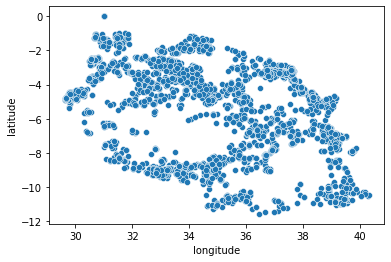

In [85]:
sns.scatterplot(data=errors, x='longitude', y='latitude')
plt.show()

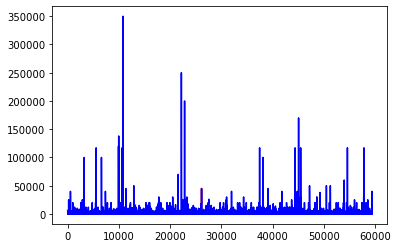

In [87]:
errors['amount_tsh'].plot(c='red')
data2['amount_tsh'].plot(c='blue')
plt.show()

In [92]:
submit_X = pd.read_csv('Source_data/testset_values.csv')

In [50]:
train_num = submit_X.loc[:,['amount_tsh', 'gps_height', 'population',]]

In [51]:
for c in train_num.columns:
    train_num[c] = scaler.fit_transform(train_num.loc[:,c].to_numpy().reshape(-1,1))#

In [59]:
train_num

,amount_tsh,gps_height,population
0,-0.128571,1.939784,0.291567
1,-0.128571,1.322052,0.246837
2,-0.128571,1.319159,0.672837
3,-0.128571,-0.561525,0.140337
4,0.070562,0.875028,-0.264363
...,...,...,...
14845,-0.128571,-0.898602,-0.349563
14846,0.269695,-0.947789,5.912637
14847,-0.128571,1.187511,0.033837
14848,-0.128571,0.495998,-0.072663


In [53]:
colt = ColumnTransformer([('basin', ohe, ['basin']), 
                          ('r_code', ohe, ['region_code']), 
                          ('d_code', ohe, ['district_code']), 
                          ('ex', ohe, ['extraction_type']), 
                          ('pay', ohe, ['payment_type']), 
                          ('qual', ohe, ['water_quality']),
                          ('quant', ohe, ['quantity']), 
                          ('s_type', ohe, ['source']),
                          ('mang', ohe, ['management']),
                          ('mang_g', ohe, ['management_group']),
                          ('wp_type', ohe, ['waterpoint_type']),
                         ('fund', ohe, ['funder']),
                         ('inst', ohe, ['installer']),
                         ('subv', ohe, ['subvillage']),
                         ('ward', ohe, ['ward']),
                         ('sch_man', ohe, ['scheme_management']),
                         ('sch', ohe, ['scheme_name'])])

In [60]:
train_cat = submit_X.loc[:,['basin', 'region_code', 'district_code', 'extraction_type', 'payment_type', 'water_quality', 
                           'quantity', 'source', 'management', 'management_group', 'waterpoint_type', 
                           'funder', 'installer', 'subvillage', 'ward', 'scheme_management', 'scheme_name']]
train_df = colt.fit_transform(train_cat).toarray()

In [61]:
train_df

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [62]:
train_cat = pd.DataFrame(train_df, columns=colt.get_feature_names())

In [63]:
train_cat

,basin__x0_Lake Nyasa,basin__x0_Lake Rukwa,basin__x0_Lake Tanganyika,basin__x0_Lake Victoria,basin__x0_Pangani,basin__x0_Rufiji,basin__x0_Ruvuma / Southern Coast,basin__x0_Wami / Ruvu,r_code__x0_2,r_code__x0_3,...,sch__x0_upper Ruvu,sch__x0_upper ruvu,sch__x0_wangama water supply scheme,sch__x0_wanging'ombe supply scheme,sch__x0_wanging'ombe water supply s,sch__x0_wanginyi water supplied sch,sch__x0_water supply at Nyakasungwa,sch__x0_water supply in Kalebejo,sch__x0_water supply in katungulu,sch__x0_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14848,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
train = train_num.merge(train_cat, left_index=True, right_index=True)

In [65]:
train.shape

(14850, 14390)

In [58]:
train.shape

(14850, 14390)

In [25]:
train = train.merge(data2[['lga_Njombe', 'year', 'month', 'tsh_bin', 'years_old', 'popbins', 'longitude', 'latitude', 
                          'public_meeting', 'permit']], left_index=True, right_index=True)

In [26]:
train_X, test_X, train_y, test_y = train_test_split(train, data2['label'], test_size=0.25, random_state=42)

In [27]:
rf = RandomForestClassifier()
params = {'n_estimators':[10, 100, 200, 500], 'criterion':['gini', 'entropy']}
rs = RandomizedSearchCV(rf, params, n_iter=5)

In [28]:
rf.fit(train_X, train_y)
rf.score(test_X, test_y)

0.7979124579124579

In [28]:
submition = rf.predict(sub_train)

In [29]:
submission1 = pd.DataFrame(submition, columns=['status_group'])
submission1['id'] = submit_X['id']

In [30]:
submission1.to_csv('submission1_BW.csv')

In [96]:
def test_transformer(data):
    data = data.drop(columns=['source_type', 'source_class'])

    data = data.drop(columns=['extraction_type_group', 'extraction_type_class'])
    data['extraction_type'].replace({'other - swn 81':'other-handpump',
                                 'other - play pump':'other-handpump', 
                                 'walimi':'other-handpump', 
                                 'other - mkulima/shinyanga':'other-handpump',
                                'swn 80':'swn_80',
                                 'nira/tanira':'nira-tanira',
                                'india mark ii':'india_mark_ii',
                                'india mark iii':'india_mark_iii',
                                'other - rope pump':'other-rope_pump',}, inplace=True)

    data['source'].replace({'shallow well':'shallow_well',
                       'machine dbh':'machine_dbh',
                       'rainwater harvesting':'rainwater_harvesting',
                       'hand dtw':'hand_dtw'}, inplace=True)

    counts = data['subvillage'].value_counts()
    counts = counts.loc[counts >=200]
    counts = list(counts.index)
    data.loc[~data['subvillage'].isin(counts), 'subvillage'] = 'other'

    data.drop(columns=['region'], inplace=True)

    data.fillna(inplace=True, value={'installer':'unknown','permit':False, 'funder':'unknown', 'public_meeting':False, 
                                 'scheme_management':'unknown', 'scheme_name':'unknown'})

    data['lga_Njombe'] = data['lga'].replace({'Njombe':1})
    data.loc[data['lga_Njombe']!=1, 'lga_Njombe'] = 0

    data.drop(columns=['payment'], inplace=True)

    data['basin'].replace({'Ruvuma / Southern Coast':'Ruvuma-Southern_Coast',
                     'Wami / Ruvu':'Wami-Ruvu'}, inplace=True)

    data['date_recorded']= pd.to_datetime(data['date_recorded'])
    data['date_recorded'].describe(datetime_is_numeric=True)
    data['year']=data['date_recorded'].dt.year
    data['month']=data['date_recorded'].dt.month

    data.drop(columns=['wpt_name', 'num_private', 'recorded_by'], inplace=True)

    data['amount_tsh'] = data['amount_tsh'].astype('int')
    data['tsh_bin'] = pd.cut(data['amount_tsh'], [-1, 1, 20.0, 30.0, 50.0, 100.0, 250, 500.0, 1000.0, 2200.0, 70000.0, 500000],
                         labels=list(range(1,12)))

    data['public_meeting'] = data['public_meeting'].map({True:1, False:0})

    data['permit'] = data['permit'].map({True:1, False:0})

    data['construction_year'].replace({0:1999}, inplace=True)
    data['construction_year'] = pd.to_datetime(data['construction_year'], format='%Y')
    data['years_old'] = data['date_recorded'].dt.year - data['construction_year'].dt.year

    data.drop(columns=['quality_group', 'quantity_group'], inplace=True)

    data.drop(columns=['waterpoint_type_group'],inplace=True)

    counts2 = data['scheme_name'].value_counts()
    counts2 = counts2.loc[counts2 >=200]
    counts2 = list(counts2.index)
    data.loc[~data['scheme_name'].isin(counts2), 'scheme_name'] = 'other'

    counts3 = data['funder'].value_counts()
    counts3 = counts3.loc[counts3 >=500]
    counts3 = list(counts3.index)
    data.loc[~data['funder'].isin(counts3), 'funder'] = 'other'

    counts4 = data['installer'].value_counts()
    counts4 = counts4.loc[counts4 >=500]
    counts4 = list(counts4.index)
    data.loc[~data['installer'].isin(counts4), 'installer'] = 'other'

    data['popbins'] = pd.cut(data['population'], [-1,2,250,500,1000,2500,10000,40000], labels=list(range(1,8)))

    counts5 = data['ward'].value_counts()
    verybig = counts5.loc[counts5.between(200,400)].index
    big = counts5.loc[counts5.between(100,200)].index
    medium = counts5.loc[counts5.between(50,100)].index
    small = counts5.loc[counts5.between(25,50)].index
    verysmall = counts5.loc[counts5 <=25].index
    data.loc[data['ward'].isin(verybig), 'ward'] = 'verybig'
    data.loc[data['ward'].isin(big), 'ward'] = 'big'
    data.loc[data['ward'].isin(medium), 'ward'] = 'medium'
    data.loc[data['ward'].isin(small), 'ward'] = 'small'
    data.loc[data['ward'].isin(verysmall), 'ward'] = 'verysmall'

    data['longitude'] = data['longitude'].replace({0:np.random.choice(range(31,33))})

In [97]:
test_transformer(submit_X)

In [100]:
submit_X.shape, submit_X.columns

((14850, 40),
 Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
        'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
        'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
        'ward', 'population', 'public_meeting', 'recorded_by',
        'scheme_management', 'scheme_name', 'permit', 'construction_year',
        'extraction_type', 'extraction_type_group', 'extraction_type_class',
        'management', 'management_group', 'payment', 'payment_type',
        'water_quality', 'quality_group', 'quantity', 'quantity_group',
        'source', 'source_type', 'source_class', 'waterpoint_type',
        'waterpoint_type_group'],
       dtype='object'))

In [101]:
data2.shape, data2.columns

((59400, 36),
 Index(['id', 'label', 'prediction', 'amount_tsh', 'date_recorded', 'funder',
        'gps_height', 'installer', 'longitude', 'latitude', 'basin',
        'subvillage', 'region_code', 'district_code', 'ward', 'population',
        'public_meeting', 'scheme_management', 'scheme_name', 'permit',
        'construction_year', 'extraction_type', 'management',
        'management_group', 'payment_type', 'water_quality', 'quantity',
        'source', 'waterpoint_type', 'lga_Njombe', 'year', 'month', 'tsh_bin',
        'years_old', 'popbins', 'label2'],
       dtype='object'))